In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cleaning_function as cf
%matplotlib inline

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 5000)

df0 = pd.read_csv('./survey_results_public.csv')
df_schema = pd.read_csv('./survey_results_schema.csv')

In [2]:
df = cf.cleaning_function(df0)

/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)



Transformation Overview:
Original dataframe dimension were (19102, 154)
New dataframe dimension are (3604, 1002)


In [3]:
df.head()

,JobSatisfaction,HoursPerWeek=0,HoursPerWeek=1,HoursPerWeek=2-5,HoursPerWeek=6-20,HoursPerWeek=20+,Remote=FewDaysPerMonth,Remote=HalfTime,Remote=FullTime,Remote=ItsComplicated,Remote=1PlusDaysPerWeek,Remote=MoreThanHalf,Remote=Never,Salary=<75k,Salary=75-99k,Salary=100-149k,Salary=150k+,DeveloperType=Data scientist,DeveloperType=Database administrator,DeveloperType=Desktop applications developer,DeveloperType=DevOps specialist,DeveloperType=Developer with a statistics or mathematics background,DeveloperType=Embedded applications/devices developer,DeveloperType=Graphic designer,DeveloperType=Graphics programming,DeveloperType=Machine learning specialist,DeveloperType=Mobile developer,DeveloperType=Other,DeveloperType=Quality assurance engineer,DeveloperType=Systems administrator,DeveloperType=Web developer,ImportantBenefits=Annual bonus,ImportantBenefits=Charitable match,ImportantBenefits=Child/elder care,ImportantBenefits=Education sponsorship,ImportantBenefits=Equipment,ImportantBenefits=Expected work hours,ImportantBenefits=Health benefits,ImportantBenefits=Long-term leave,ImportantBenefits=Meals,ImportantBenefits=None of these,ImportantBenefits=Other,ImportantBenefits=Private office,ImportantBenefits=Professional development sponsorship,ImportantBenefits=Remote options,ImportantBenefits=Retirement,ImportantBenefits=Stock options,ImportantBenefits=Vacation/days off,JobProfile=Dice,JobProfile=Glassdoor,JobProfile=Hired.com,JobProfile=Indeed,JobProfile=LinkedIn,JobProfile=Monster,JobProfile=Other,JobProfile=TripleByte,EducationTypes=Bootcamp,EducationTypes=Coding competition,EducationTypes=Hackathon,EducationTypes=Industry certification,EducationTypes=On-the-job training,EducationTypes=Online course,EducationTypes=Open source contributions,EducationTypes=Part-time/evening course,EducationTypes=Self-taught,SelfTaughtTypes=Built-in help,SelfTaughtTypes=Company internal community,SelfTaughtTypes=Friends network,SelfTaughtTypes=Non-Stack online communities,SelfTaughtTypes=Official documentation,SelfTaughtTypes=Other,SelfTaughtTypes=Stack Overflow Docs,SelfTaughtTypes=Stack Overflow Q&A,SelfTaughtTypes=Textbook,SelfTaughtTypes=Trade book,SelfTaughtTypes=Tutoring/mentoring,CousinEducation=Bootcamp,CousinEducation=Buy books and work through the exercises,CousinEducation=Conferences/meet-ups,CousinEducation=Contribute to open source,CousinEducation=Get a job as a QA tester,CousinEducation=Master's degree,CousinEducation=None of these,CousinEducation=Other,CousinEducation=Part-time/evening courses,CousinEducation=Participate in hackathons,CousinEducation=Participate in online coding competitions,CousinEducation=Return to college,CousinEducation=Take online courses,HaveWorkedLanguage=Assembly,HaveWorkedLanguage=C,HaveWorkedLanguage=C#,HaveWorkedLanguage=C++,HaveWorkedLanguage=Clojure,HaveWorkedLanguage=CoffeeScript,HaveWorkedLanguage=Common Lisp,HaveWorkedLanguage=Dart,HaveWorkedLanguage=Elixir,HaveWorkedLanguage=Erlang,HaveWorkedLanguage=F#,HaveWorkedLanguage=Go,HaveWorkedLanguage=Groovy,HaveWorkedLanguage=Hack,HaveWorkedLanguage=Haskell,HaveWorkedLanguage=Java,HaveWorkedLanguage=JavaScript,HaveWorkedLanguage=Julia,HaveWorkedLanguage=Lua,HaveWorkedLanguage=Matlab,HaveWorkedLanguage=Objective-C,HaveWorkedLanguage=PHP,HaveWorkedLanguage=Perl,HaveWorkedLanguage=Python,HaveWorkedLanguage=R,HaveWorkedLanguage=Ruby,HaveWorkedLanguage=Rust,HaveWorkedLanguage=SQL,HaveWorkedLanguage=Scala,HaveWorkedLanguage=Smalltalk,HaveWorkedLanguage=Swift,HaveWorkedLanguage=TypeScript,HaveWorkedLanguage=VB.NET,HaveWorkedLanguage=VBA,HaveWorkedLanguage=Visual Basic 6,WantWorkLanguage=Assembly,WantWorkLanguage=C,WantWorkLanguage=C#,WantWorkLanguage=C++,WantWorkLanguage=Clojure,WantWorkLanguage=CoffeeScript,WantWorkLanguage=Common Lisp,WantWorkLanguage=Dart,WantWorkLanguage=Elixir,WantWorkLanguage=Erlang,WantWorkLanguage=F#,WantWorkLanguage=Go,WantWorkLanguage=Groovy,WantWorkLanguage=Hack,WantWorkLanguage=Haskell,WantWorkLanguage=Java,WantWorkLanguage=JavaScrip

In [4]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as stats_model
from scipy import stats

In [5]:
keep_vars = [
    'Remote=FewDaysPerMonth', 'Remote=HalfTime',
    'Remote=FullTime', 'Remote=ItsComplicated',
    'Remote=1PlusDaysPerWeek', 'Remote=MoreThanHalf' #,'Remote=Never'
]
X = df.loc[:, keep_vars]
X['Constant'] = 1
y = df['JobSatisfaction']

model_inst = stats_model.OLS(y, X, hasconst=True, missing='raise')
base_model = model_inst.fit(cov_type='HC3')
print(base_model.summary2())

                   Results: Ordinary least squares
Model:               OLS               Adj. R-squared:      0.005     
Dependent Variable:  JobSatisfaction   AIC:                 15655.5167
Date:                2019-10-11 08:38  BIC:                 15698.8453
No. Observations:    3604              Log-Likelihood:      -7820.8   
Df Model:            6                 F-statistic:         nan       
Df Residuals:        3597              Prob (F-statistic):  nan       
R-squared:           0.006             Scale:               4.5001    
----------------------------------------------------------------------
                         Coef.  Std.Err.    z    P>|z|   [0.025 0.975]
----------------------------------------------------------------------
Remote=FewDaysPerMonth   0.2064   0.0930  2.2178 0.0266  0.0240 0.3887
Remote=HalfTime          0.4506   0.2286  1.9711 0.0487  0.0025 0.8987
Remote=FullTime          0.4723   0.1226  3.8514 0.0001  0.2319 0.7126
Remote=ItsComplicated   -0

Here a base model tells us that giving workers some level of non-complicated remote working status vs never letting them work remote will increase their job satisfaction a little (in some cases as much as half a point almost.) Below I added a control for how hard the worker feels it is to work remotely with peers. I printed the question. 

In [6]:
print('\nCollaborateRemote question on the survey:\n')
print(list(df_schema[df_schema.Column.eq('CollaborateRemote')]['Question']))
print('\nUsers could answer on the 5 point spectrum'
      'from Strongly agree to strongly disagree')


CollaborateRemote question on the survey:

["It's harder to collaborate with remote peers than those on site"]

Users could answer on the 5 point spectrumfrom Strongly agree to strongly disagree


In [7]:
keep_vars = [
    'Remote=FewDaysPerMonth', 'Remote=HalfTime',
    'Remote=FullTime', 'Remote=ItsComplicated',
    'Remote=1PlusDaysPerWeek', 'Remote=MoreThanHalf', #,'Remote=Never'
    'CollaborateRemote=Agree', 'CollaborateRemote=Somewhat agree',
    'CollaborateRemote=Disagree', 
    'CollaborateRemote=Strongly disagree' #,'CollaborateRemote=Strongly agree'
]
X = df.loc[:, keep_vars]
X['Constant'] = 1
y = df['JobSatisfaction']

model_inst = stats_model.OLS(y, X, hasconst=True, missing='raise')
base_model = model_inst.fit(cov_type='HC3')
print(base_model.summary2())

                          Results: Ordinary least squares
Model:                    OLS                   Adj. R-squared:          0.008     
Dependent Variable:       JobSatisfaction       AIC:                     15646.4535
Date:                     2019-10-11 08:38      BIC:                     15714.5413
No. Observations:         3604                  Log-Likelihood:          -7812.2   
Df Model:                 10                    F-statistic:             nan       
Df Residuals:             3593                  Prob (F-statistic):      nan       
R-squared:                0.011                 Scale:                   4.4839    
-----------------------------------------------------------------------------------
                                     Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------------------------
Remote=FewDaysPerMonth               0.2084   0.0930  2.2415 0.0250  0.0262  0.3905
Remote=HalfTime   

When we control for the users' preferences and how they feel working remotely makes it harder or easier to work with others the effects start to increase a little more and become more significant.

Problem: We have almost 1000 variables and in my opinion that is too many to add to a regression with only 3600 data points. I want to limit the amount of variables I add to around 30. 

In [8]:
from sklearn.ensemble import RandomForestRegressor

take_out_vars = [
    'Remote=FewDaysPerMonth', 'Remote=HalfTime',
    'Remote=FullTime', 'Remote=ItsComplicated',
    'Remote=1PlusDaysPerWeek', 'Remote=MoreThanHalf',
    'Remote=Never', 'JobSatisfaction']

X = df.drop(take_out_vars, axis=1)
y = df['JobSatisfaction']

rf_model = RandomForestRegressor(n_estimators=5000, random_state=333)
rf_model = rf_model.fit(X, y)

In [9]:
rf_vars = pd.DataFrame(index=np.arange(0,len(X.columns),1))
rf_vars['feature_name'] = X.columns
rf_vars['variable_importance'] = rf_model.feature_importances_

print('\nHere is a look at a few of the top important features'
      'from the random forest output')
rf_vars.sort_values(by='variable_importance', ascending=False).head(10)


Here is a look at a few of the top important featuresfrom the random forest output


,feature_name,variable_importance
538,JobSeekingStatus=I am actively looking for a job,0.098101
539,JobSeekingStatus=I am not interested in new jo...,0.088733
2,HoursPerWeek=2-5,0.008670
826,InfluenceWorkstation=No influence at all,0.008192
898,StackOverflowJobListing=Several times,0.003887
786,DifficultCommunication=Somewhat agree,0.003748
294,"EmploymentStatus=Independent contractor, freel...",0.003523
455,ProblemSolving=Somewhat agree,0.003462
906,StackOverflowJobSearch=Haven't done at all,0.003430
767,OtherPeoplesCode=Strongly agree,0.003400


In [10]:
keep_vars = ['Remote=FewDaysPerMonth', 'Remote=HalfTime',
    'Remote=FullTime', 'Remote=ItsComplicated',
    'Remote=1PlusDaysPerWeek', 'Remote=MoreThanHalf']

adj_r_squared_vals = list()
r_squared_vals = list()
full_time = list()
lower_bound = list()
for i in range(500):
    keep_vars.append((rf_vars
             .sort_values(by='variable_importance', ascending=False)
             .iloc[i]['feature_name']))
    
    X = df.loc[:, keep_vars]
    X['Constant'] = 1
    y = df['JobSatisfaction']

    model_inst = stats_model.OLS(y, X, hasconst=True, missing='raise')
    base_model = model_inst.fit(cov_type='HC3')
    adj_r_squared_vals.append(base_model.rsquared_adj)
    r_squared_vals.append(base_model.rsquared)
    full_time.append(base_model.params['Remote=FullTime'])
    lower_bound.append(base_model.conf_int()[0]['Remote=FullTime'])
    # print(base_model.summary2())

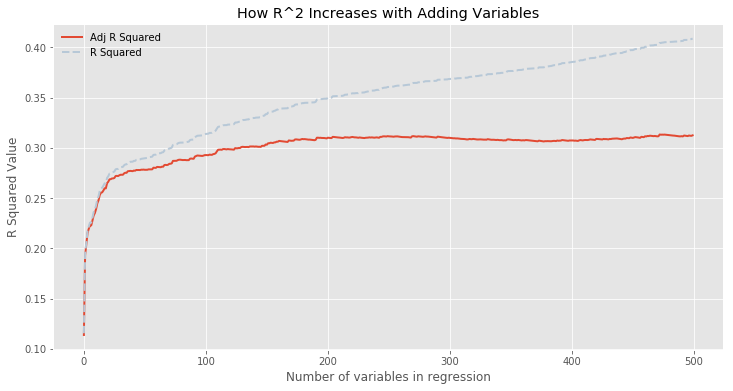

In [11]:
plt.style.use('ggplot')
plt.figure(figsize=(12,6))
plt.plot(adj_r_squared_vals, linewidth=2)
plt.plot(r_squared_vals, color='#B7C8D7', linestyle='--', linewidth=2)
plt.title('How R^2 Increases with Adding Variables')
plt.ylabel('R Squared Value')
plt.xlabel('Number of variables in regression')
plt.legend(['Adj R Squared', 'R Squared'], frameon=False);

Career satisfaction was a heavy influencer of explaining a persons current job satisfaction in both the random forest and the regression. 

A good general rule is to have no more than 1 variable for every 10 observations which means we could have up to 300 variables in our regression potentially. There is a distinct leveling off around 30 variables and we don't pick up too much explanatory value by adding more variables. For a base quick estimation I will stick with about 35 variables and then reverse select non significant variables (If it is not essential we control for them.) We might want to leave some variables in that are not significant so we can say we controlled for that. 

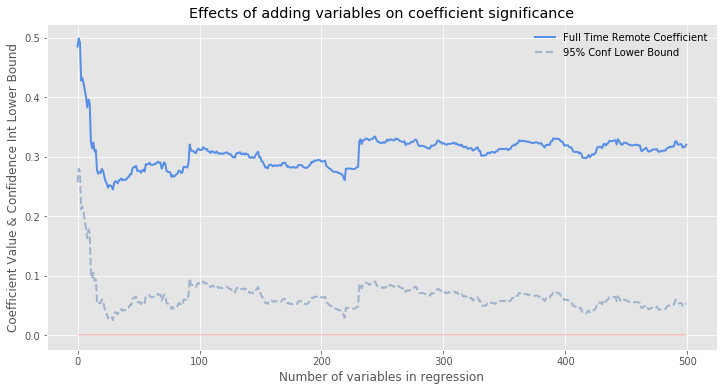

In [12]:
plt.style.use('ggplot')
plt.figure(figsize=(12,6))
plt.plot(full_time, linewidth=2, color='#578fe6')
plt.plot(lower_bound, color='#a1b2cc', linestyle='--', linewidth=2)
plt.plot([0]*len(lower_bound), color='r', linewidth=.3)
plt.title('Effects of adding variables on coefficient significance')
plt.ylabel('Coefficient Value & Confidence Int Lower Bound')
plt.xlabel('Number of variables in regression')
plt.legend(['Full Time Remote Coefficient', '95% Conf Lower Bound'], frameon=False);

In [13]:
keep_vars = ['Remote=FewDaysPerMonth', 'Remote=HalfTime',
    'Remote=FullTime', 'Remote=ItsComplicated',
    'Remote=1PlusDaysPerWeek', 'Remote=MoreThanHalf']
keep_vars.extend(list(rf_vars
                  .sort_values(by='variable_importance', ascending=False)
                  .head(30)['feature_name']))

X = df.loc[:, keep_vars]
X['Constant'] = 1
y = df['JobSatisfaction']

model_inst = stats_model.OLS(y, X, hasconst=True, missing='raise')
base_model = model_inst.fit(cov_type='HC3')
# print(base_model.summary2())

After reviewing the variables I felt like the ones in the drop list below were represented within other variables so I won't lose much by dropping and helping reduce the number of variables in the regression. After that I annotated in the drop list where I backward selected some more of the non-significant variables from least significant until

In [19]:
drop_list = ['ProblemSolving=Disagree',
                 #removing: non significant and we have a correlated variable
             'ProgramHobby=Yes, both',
                 #removing: non sign and have a similar variable
             'SeriousWork=Disagree'
                 #same logic as others
            ]
important_vars = list(rf_vars
                      .sort_values(by='variable_importance', ascending=False)
                      .head(30)['feature_name'])
keep_vars = ['Remote=FewDaysPerMonth', 'Remote=HalfTime',
    'Remote=FullTime', 'Remote=ItsComplicated',
    'Remote=1PlusDaysPerWeek', 'Remote=MoreThanHalf']
not_in = list(np.setdiff1d(important_vars, drop_list))

keep_vars.extend(not_in)

X = df.loc[:, keep_vars]
X['Constant'] = 1
y = df['JobSatisfaction']

model_inst = stats_model.OLS(y, X, hasconst=True, missing='raise')
base_model = model_inst.fit(cov_type='HC3') 
print(base_model.summary2())

                                           Results: Ordinary least squares
Model:                               OLS                               Adj. R-squared:                      0.272     
Dependent Variable:                  JobSatisfaction                   AIC:                                 14554.5127
Date:                                2019-10-11 19:30                  BIC:                                 14764.9659
No. Observations:                    3604                              Log-Likelihood:                      -7243.3   
Df Model:                            33                                F-statistic:                         nan       
Df Residuals:                        3570                              Prob (F-statistic):                  nan       
R-squared:                           0.279                             Scale:                               3.2909    
--------------------------------------------------------------------------------------------

## Major Takaways & When I go back and work on this - To-Do's 

I would try and break down certain variables farter like the years coding variable at a certain breakpoint to reduce the amount of variables there. 

Additionally a lot more time and care could be taken into choosing which variables to keep!. We have about a thousand variables and we really should use some domain knowledge and critical thinking about which ones to keep. Also there is not always a 1-1 relationship between what a random forest will indicate as important and what a regression will pick when you remove insignificant variables one by one (I believe this is mostly due to the fact that random forest techniques do a better job of finding non-linear relationships in the data). I have found that using a tree based approach though gets you pretty close to a solution to help figure out what to drop in a timely manner when you are looking for a quick and dirty approach. Ideally with more time we would spend time creating interactions and higher order terms for each of the variables and look for non linear relationships. 


One thing I will try is to collapse the remote working categories as they may be taking variation from each other. From the regression you can see a few of the categories like "Half the time" and "More than half" are sort of similar. These might be able to be condensed since they are similar and potentially competing. This might help us reach the conventional p-value < 0.05 and reach significance on some variables. There are a few interesting takeaways. There definitely seems to be a distinct difference in happiness between those who worked remotely on a reasonably consistent cadence vs those who never get to work from home or have a complicated remote working policy. I think a strong case can be made that workers should be given at least a little time during each week to work remotely in the professional programming sphere and an employer should do their very best to make sure it's NOT COMPLICATED! Overall there seems to be about a 0.20 to 0.40 increase in a workers job satisfaction on a scale 1-10 vs a worker who never gets to work from home when you take a lot of features about them into account. We didn't control for everything we know about the worker but we controlled for a lot of features like their level of education, how many hours a week they might work, the size of their compnay and how they collaborate with coworkers. I think it is telling that no matter how many variables we add or subract the Full time remote worker coefficient is always significant. Offering/Asking for remote working policy in your next compensation package seems worth it from a job satisfaction standpoint. 
 